In [1]:
import pandas as pd
import numpy as np
from khaiii import KhaiiiApi
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./modi_data/SW교육+소프트웨어교육.csv") ############
#data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,path,title,date,press,content
0,https://news.naver.com/main/read.nhn?mode=LSD&...,"[신년사]""인성교육 바탕 위에 창의성 갖춘 인재 육성 주력""",2015.01.01. 오전 7:00,뉴스1,설동호 대전시교육감(대전=뉴스1) 송애진 기자 = ‘행복한 학교 희망의 대전교육’...
1,https://news.naver.com/main/read.nhn?mode=LSD&...,"[신년사] ""시민이 행복한 새로운 인천 만들 것""",2015.01.01. 오전 9:00,뉴스1,유정복 인천시장. 2014.12.31/뉴스1 © News1 강남주 기자유정복 인천시...
2,https://news.naver.com/main/read.nhn?mode=LSD&...,부산정보산업진흥원 `ICT신사업단` 신설 등 조직 개편,2015.01.02. 오후 3:15,전자신문,\t\t부산정보산업진흥원이 새해 조직을 바꾸고 정보통신기술(ICT)과 콘텐츠산업의 ...
3,https://news.naver.com/main/read.nhn?mode=LSD&...,"새해 달라지는 SW 정책, '바로 이렇게 달라져!'",2015.01.02. 오후 9:28,한국경제TV,올해 4월부터는 이동통신사업자가 청소년과 휴대폰 계약을 체결할 경우 청소년유해 매체...
4,https://news.naver.com/main/read.nhn?mode=LSD&...,"새해 달라지는 SW 정책 내용보니 ""청소년 휴대전화 가입시 음란물 차단 의무화""",2015.01.02. 오후 10:08,헤럴드POP,\t\t[헤럴드POP]올해 4월부터는 이동통신사업자가 청소년과 휴대전화 계약을 체결...


In [3]:
api = KhaiiiApi()
def khaiiiTokenizer(raw, pos=['NNG', 'NNP', 'NNB', 'NP', 'NR', 'SL']):#, stopword=stopword,): # 일반명사 고유명사 의존명사 대명사 수사 외국어
    list = []

    for word in api.analyze(raw): #raw data
        for i, morph in enumerate(word.morphs):
            if len(morph.lex) > 1 and morph.tag in pos: #and morph.lex not in stopword: 
                if morph.tag == 'SL':
                    morph.lex = morph.lex.lower()
                list.append(morph.lex)
                
    return list

In [5]:
tokenized = data['content'].apply(lambda row: khaiiiTokenizer(row))
#tokenized.head()
#tokenized.to_excel("./final_data/0327token_full.xlsx") ##############
print("========= tokenization completed =========")

In [6]:
tokenized.head()

0    [자폐아이, 치료, 야외, 찬물, 학대인정, 안녕, 개월, 남자, 아이, 엄마, 저...
1    [교원, 임용, 시험, 공정, 투명, 학년도, 중등, 임용, 시험, 응시, 수험, ...
2    [교사, 임용, 시험, 공정, 시험, 실시, 평가, 요구, 안녕, 중등, 임용, 상...
3    [어린이집, 유치원, 실시간, cctv, 공개, 의무, 법안, 요구, 울산, 인천,...
4    [교육, 모두, 시기, 년지대, 교육, 진행, 과거, 길바닥, 아이, 수업, htt...
Name: full_data, dtype: object

In [8]:
from apyori import apriori

result = list(apriori(tokenized, min_support=0.01, min_confidence=0.2, min_lift=3, min_length=2))

df = pd.DataFrame(result)
df.head()

,items,support,ordered_statistics
0,"(교사, cctv)",0.015167,"[((cctv), (교사), 0.5588615782664942, 3.27790269..."
1,"(cctv, 사건)",0.011095,"[((cctv), (사건), 0.4087968952134541, 4.94619930..."
2,"(선생, cctv)",0.011972,"[((cctv), (선생), 0.44113842173350587, 3.1776693..."
3,"(cctv, 어린이집)",0.019978,"[((cctv), (어린이집), 0.7360931435963778, 5.375744..."
4,"(학대, cctv)",0.011270,"[((cctv), (학대), 0.4152652005174644, 11.0331935..."


In [24]:
df = pd.DataFrame(result)
df.head()

,items,support,ordered_statistics
0,"(교사, cctv)",0.015167,"[((cctv), (교사), 0.5588615782664942, 3.27790269..."
1,"(cctv, 사건)",0.011095,"[((cctv), (사건), 0.4087968952134541, 4.94619930..."
2,"(선생, cctv)",0.011972,"[((cctv), (선생), 0.44113842173350587, 3.1776693..."
3,"(cctv, 어린이집)",0.019978,"[((cctv), (어린이집), 0.7360931435963778, 5.375744..."
4,"(학대, cctv)",0.011270,"[((cctv), (학대), 0.4152652005174644, 11.0331935..."


In [25]:
df.to_csv('./modi_data/apriori.csv')

In [26]:
df['length'] = df['items'].apply(lambda x: len(x))
df = df[df['length'] == 2].sort_values(by='support', ascending=False)
df = df.reset_index(drop=True)
df.head()

,items,support,ordered_statistics,length
0,"(유치원, 어린이집)",0.053543,"[((어린이집), (유치원), 0.39102564102564097, 3.252684...",2
1,"(어린이집, 보육)",0.048487,"[((보육), (어린이집), 0.6964195663136662, 5.08600566...",2
2,"(교사, 보육)",0.046450,"[((교사), (보육), 0.2724464579901153, 3.9131719699...",2
3,"(수능, 대학)",0.040587,"[((대학), (수능), 0.3137893593919653, 3.8606257167...",2
4,"(시험, 공부)",0.039780,"[((공부), (시험), 0.31472222222222224, 3.441043506...",2


In [34]:
df.shape

(598, 4)

In [59]:
# networkx graph
G = nx.Graph()
items = df['items']
G.add_edges_from(items[:100]) # top 100개

In [60]:
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 5000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [79]:
pos = nx.spring_layout(G)

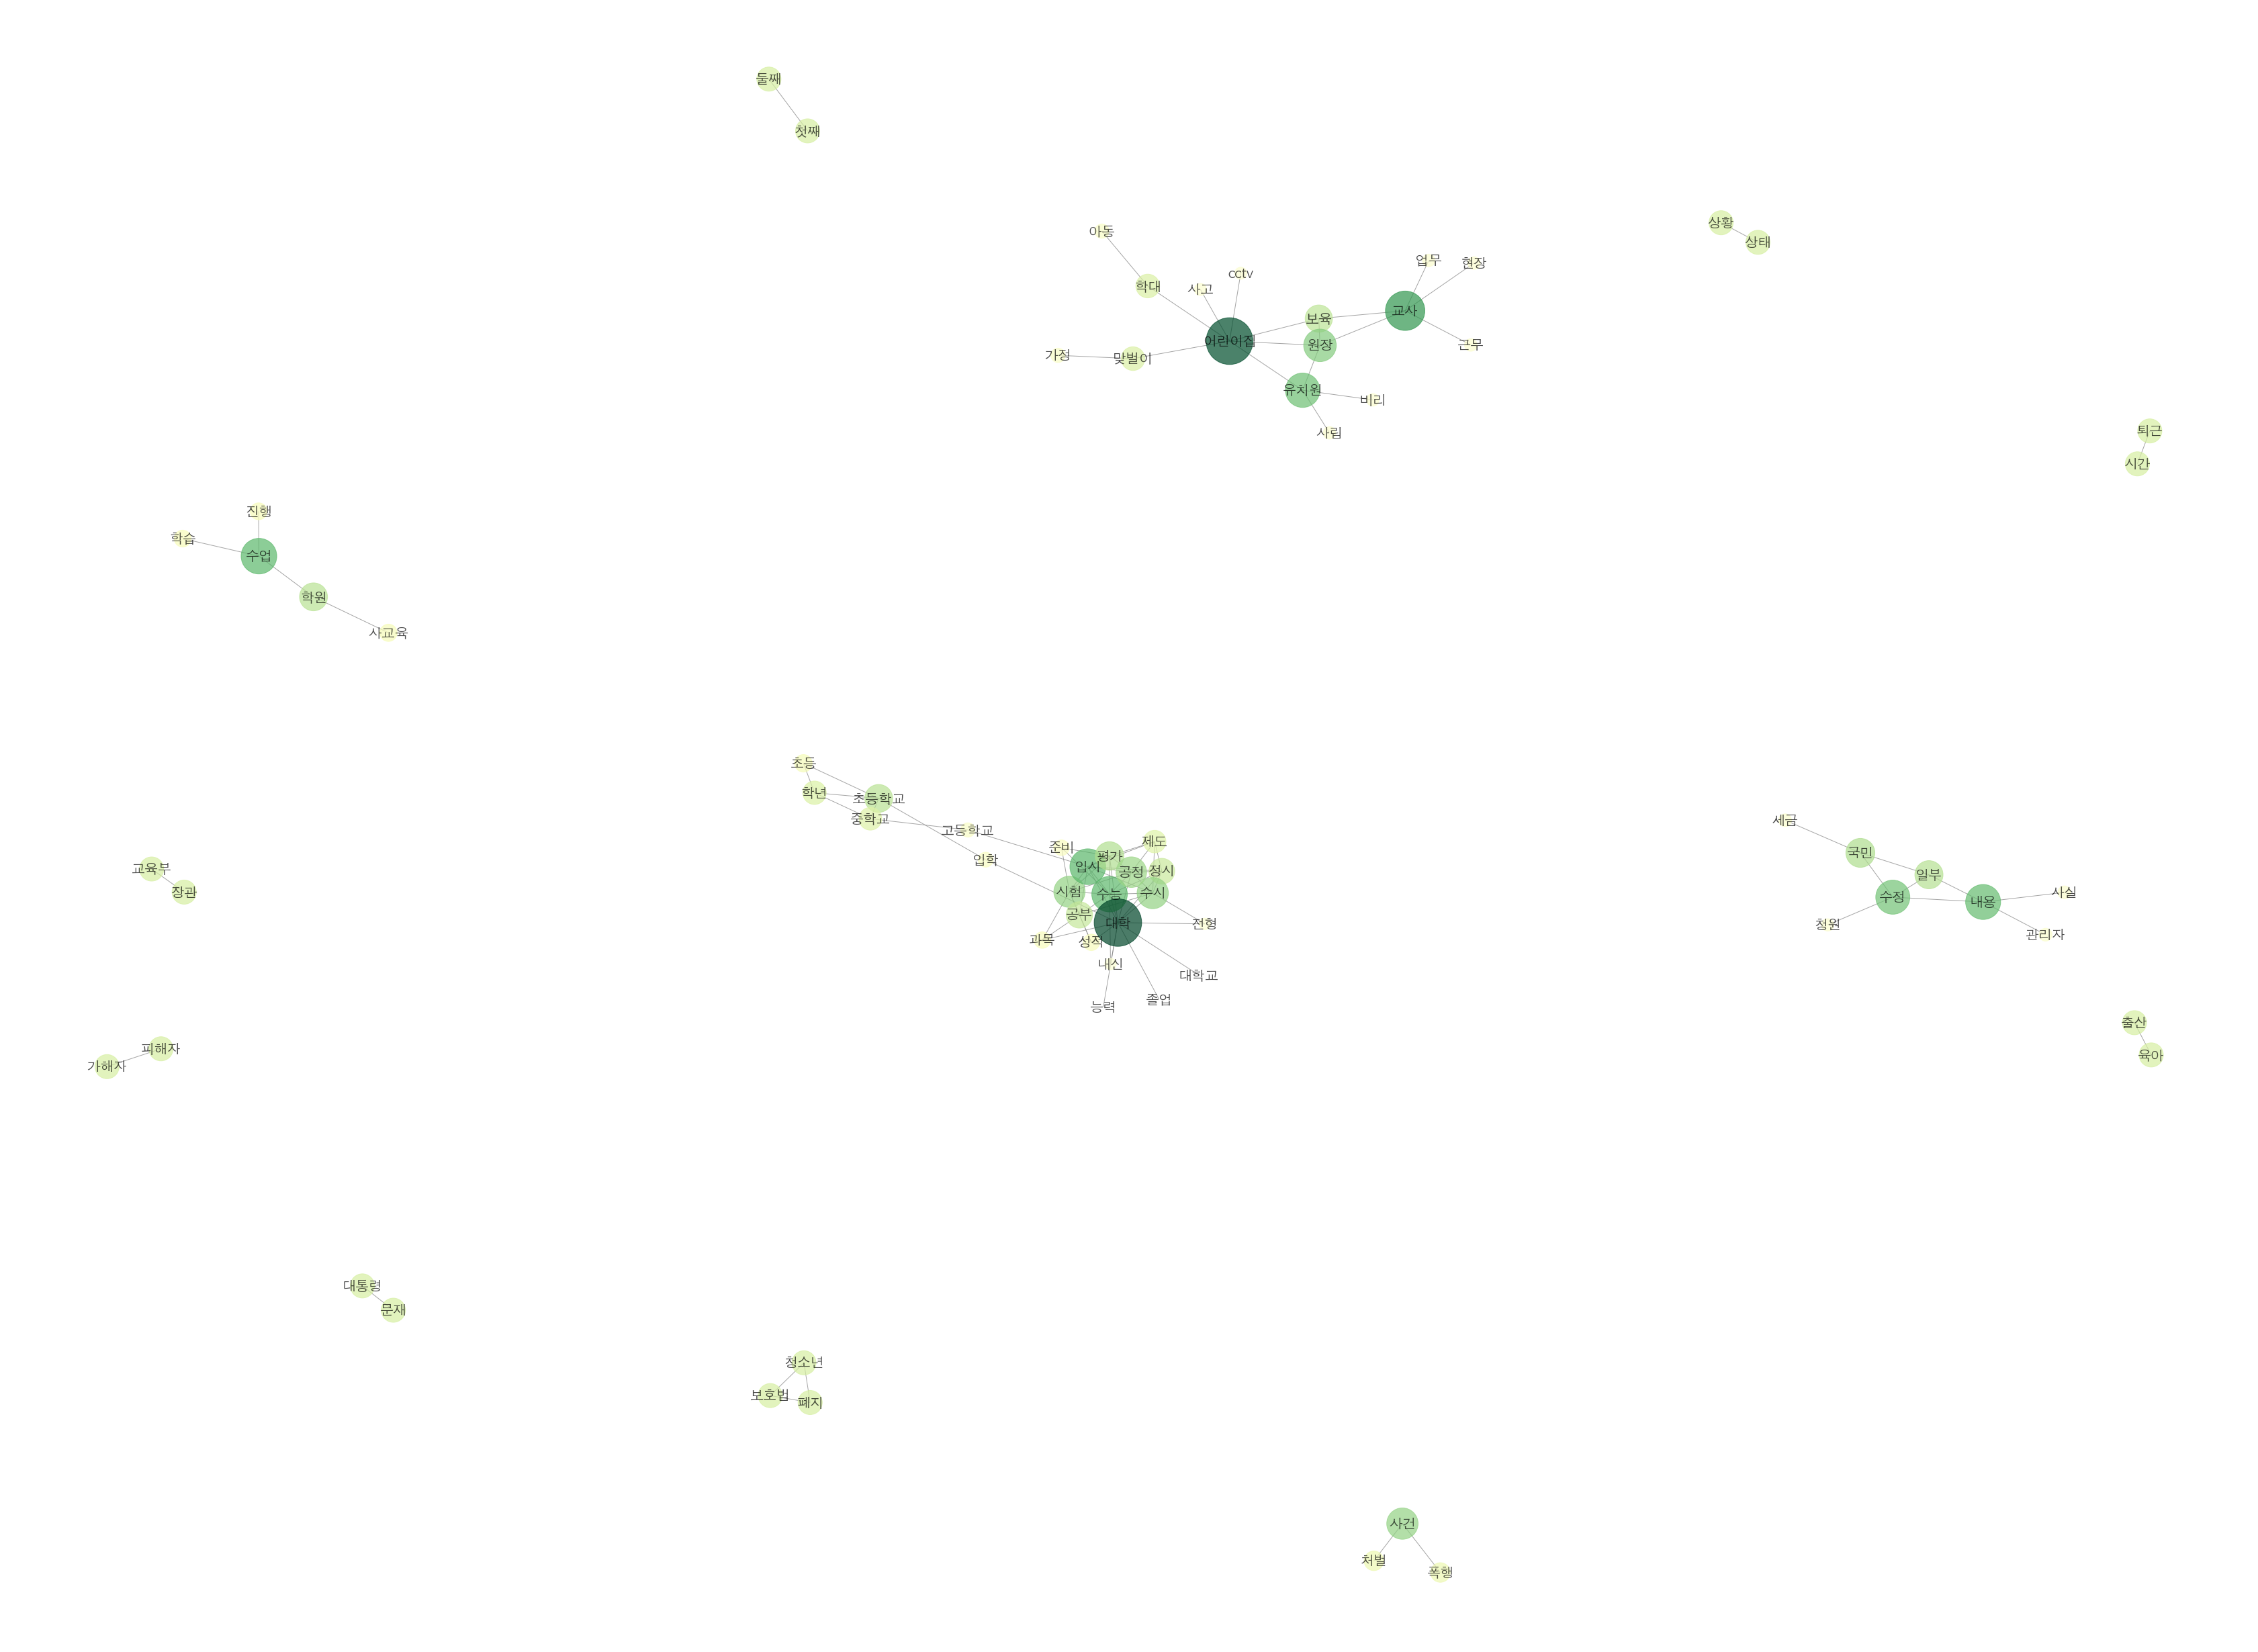

In [82]:
# network graph
plt.figure(figsize=(60, 45))
plt.axis('off')

nx.draw_networkx(G, font_family='AppleGothic', font_size=20, pos=pos, node_color=list(pr.values()), node_size=nsize, alpha=0.7, edge_color='.5', cmap=plt.cm.YlGn)
plt.savefig('./final_data/networkGraph.png', bbox_inches='tight')

In [7]:
# 전체 문서 단어 빈도수 계산 -> 상위 30개 단어만
word_list = []

for i in range(len(tokenized)):
    word_list.extend(tokenized[i])
#print(word_list)

In [8]:
from collections import defaultdict

def get_word_counter(words):
    word_counter = defaultdict(int)

    for word in words:
        word_counter[word] += 1

    return word_counter

In [9]:
word_counter = get_word_counter(word_list)

print(word_counter)

책임': 1, '모로학부모': 1, '선동자': 1, '채선당': 1, '사태니': 1, '서비스품질': 1, '숲유치원': 1, '사권': 1, '임명식': 1, '추첨등': 1, '배치식': 1, '전형료가필요': 1, '배부분': 1, '구외': 1, '협의점': 1, '김은총': 1, '성적대비': 1, '문연': 1, '문연수': 1, '유훈사': 1, '영어어학원': 1, '망망': 1, '인생이모작': 1, '우수강': 1, '우수프로그램': 1, '빈손': 2, '사단법': 1, '교총연합회': 1, '겨질정도': 1, '관심줌가지': 1, '아일': 1, '약의힘': 1, '아일생각': 1, '암것도': 1, '회발표': 1, '어젠': 1, '독촉장도': 1, '도결론': 1, '왜엄': 1, '협박아닌협박': 1, '제발지': 1, '오길야': 1, '따돌림아': 1, '대학원안': 1, '배제감': 1, '창조물': 1, '척결대상': 1, '약선': 1, '나라다얼마전': 1, '부산여중생': 9, '장사꾼': 1, '만직장': 1, '주부모니터': 2, '교육이수증': 1, '주부모니터제도': 1, '위기청소년': 1, '습자지': 1, '요밥상머리': 1, '다매': 1, '술주정뱅이에폭력아빠': 1, '일밤낮': 1, '여중생사건': 4, '간정부': 1, '아이사이': 1, '부모가더': 1, '저지경': 1, '까세아이': 1, '차혁명': 1, '교복두': 1, '발단정': 1, '학생두발머리': 1, '화납': 1, '모교학생': 1, '청소년법페지동의합': 1, '국립초': 1, '미취약': 1, '미보호': 1, '직장인이': 1, '고시개선': 1, '고사임': 1, 'ᆞ정규': 1, '직제도': 1, '보집수': 1, '결정력': 1, '징계벌': 2, '성적보수': 1, '호미': 1, '위란': 1, '메신저대화': 1, '형사벌': 2, '교욱관': 1, 'abolition': 2, 'youth': 4, 'mid

In [10]:
word_counter = pd.DataFrame(word_counter, index=[0])
print(word_counter)
#unigram_counter.to_excel('./modi_data/unigram_counter.xlsx')

   자폐아이    치료   야외  찬물  학대인정    안녕    개월    남자     아이    엄마  ...  후에  표준변환점수  \
0     4  1177  146  70     1  4089  2598  1189  49203  6065  ...   1       1   

   참가시  질서지  귀가지  근무수  연수과  예규  시사숙  로스쿨화  
0    1    1    1    1    1   1    2     2  

[1 rows x 91609 columns]


In [11]:
word_counter = word_counter.sort_values(by=0, axis=1, ascending=False)
print(word_counter)

      아이     교육     학생     학교     생각     교사     시간   어린이집     문제     사람  ...  \
0  49203  33739  33476  32787  25638  22821  15355  14518  13710  13072  ...   

   회사서  구로천왕동  뿔뿌리  버들초  장위  특활실  홀릭  남동서  팔아  수현재  
0    1      1    1    1   1    1   1    1   1    1  

[1 rows x 91609 columns]


In [12]:
#print(list(word_counter.columns)[:30])
top30 = list(word_counter.columns)[:30]

In [143]:
# hitmap을 위한 dataframe 만들기 (years, words)
df_h = pd.DataFrame() 

for year in range(2017, 2022):
    data = pd.read_csv("./modi_data/data_" + str(year) + ".csv") ############

    tokenized2 = data['full_data'].apply(lambda row: khaiiiTokenizer(row))
    print("========= tokenization" + str(year) + " completed =========")
    
    word_list = []
    for i in range(len(tokenized2)):
        word_list.extend(tokenized2[i])
    
    word_counter = defaultdict(int)
    for word in word_list:
        if word in top30:
            word_counter[word] += 1

    word_counter = pd.DataFrame(word_counter, index=[year])
    word_counter = word_counter[top30] # 순서 맞춰주기
    df_h = pd.concat([df_h, word_counter]) # 연도별로 합치기 
    #print(word_counter)

print(df_h)

========= tokenization2017 completed =========
========= tokenization2018 completed =========
========= tokenization2019 completed =========
========= tokenization2020 completed =========
========= tokenization2021 completed =========
         아이     교육     학생     학교     생각     교사     시간  어린이집    문제    사람  ...  \
2017   8421   6456   5950   5548   5314   4115   2168  1955  2435  2320  ...   
2018  28825  21557  20482  19343  15806  14751  10182  9932  8950  8450  ...   
2019   6652   3826   4013   4511   2590   1997   1844  1358  1531  1464  ...   
2020   4640   1656   2834   3165   1703   1674   1035  1139   722   713  ...   
2021    665    244    197    220    225    284    126   134    72   125  ...   

        지원    제도    사회    시험    공부    정책    폐지    경우    국가    보육  
2017  1355  1584  1488  1739  1401  1394  3489  1356  1110  1211  
2018  5066  5210  5002  4756  5151  5344  3382  4269  4622  4556  
2019  1006   696   792   698   939   705   421   871  1026   576  
2020   652   272

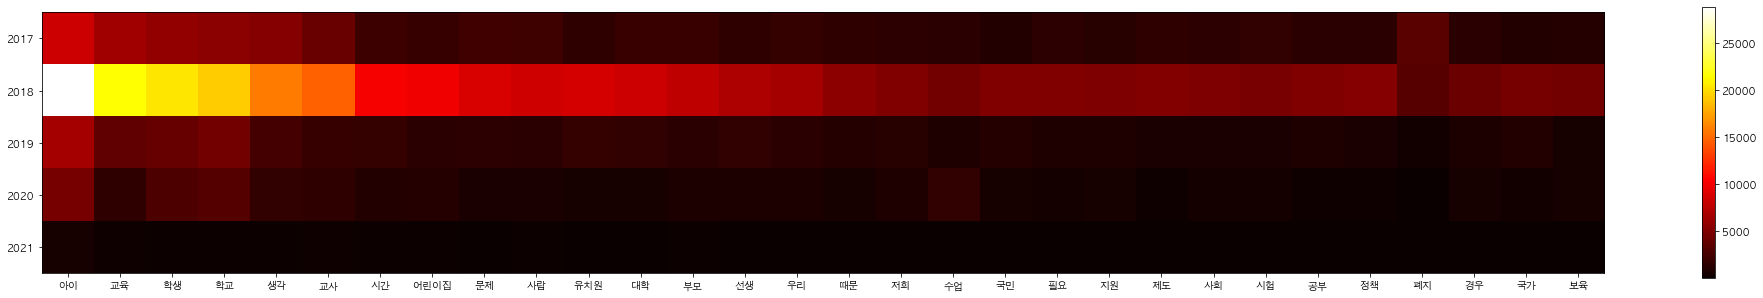

In [146]:
# hitmap graph
#df_h = df_h.transpose() # 행열 전환
#print(df_h)
plt.figure(figsize=(35, 5))
plt.xticks(range(len(top30)), df_h.columns)
plt.yticks(range(len(df_h)), df_h.index)
plt.imshow(df_h, cmap='hot')
plt.colorbar()
plt.show()

In [14]:
# hitmap을 위한 dataframe 만들기 (years, words) -> 단어 빈도 말고 연도별 비율로 
df_h2 = pd.DataFrame() 

for year in range(2017, 2022):
    data = pd.read_csv("./modi_data/data_" + str(year) + ".csv") ############

    tokenized2 = data['full_data'].apply(lambda row: khaiiiTokenizer(row))
    print("========= tokenization" + str(year) + " completed =========")
    
    word_list = []
    for i in range(len(tokenized2)):
        word_list.extend(tokenized2[i])
    
    total_word = 0
    word_counter = defaultdict(int)
    for word in word_list:
        if word in top30:
            word_counter[word] += 1
            total_word += 1
    
    for word in top30:
        word_counter[word] = word_counter[word] / total_word

    word_counter = pd.DataFrame(word_counter, index=[year])
    word_counter = word_counter[top30] # 순서 맞춰주기
    df_h2 = pd.concat([df_h2, word_counter]) # 연도별로 합치기 
    #print(word_counter)

print(df_h2)

========= tokenization2017 completed =========
========= tokenization2018 completed =========
========= tokenization2019 completed =========
========= tokenization2020 completed =========
========= tokenization2021 completed =========
            아이        교육        학생        학교        생각        교사        시간  \
2017  0.109143  0.083675  0.077116  0.071906  0.068873  0.053334  0.028099   
2018  0.106859  0.079915  0.075930  0.071707  0.058595  0.054684  0.037746   
2019  0.129869  0.074696  0.078347  0.088069  0.050565  0.038988  0.036001   
2020  0.145797  0.052035  0.089049  0.099450  0.053511  0.052600  0.032522   
2021  0.172593  0.063327  0.051129  0.057098  0.058396  0.073709  0.032702   

          어린이집        문제        사람  ...        지원        제도        사회  \
2017  0.025338  0.031559  0.030069  ...  0.017562  0.020530  0.019286   
2018  0.036819  0.033179  0.031325  ...  0.018780  0.019314  0.018543   
2019  0.026513  0.029890  0.028582  ...  0.019640  0.013588  0.015462   
2020

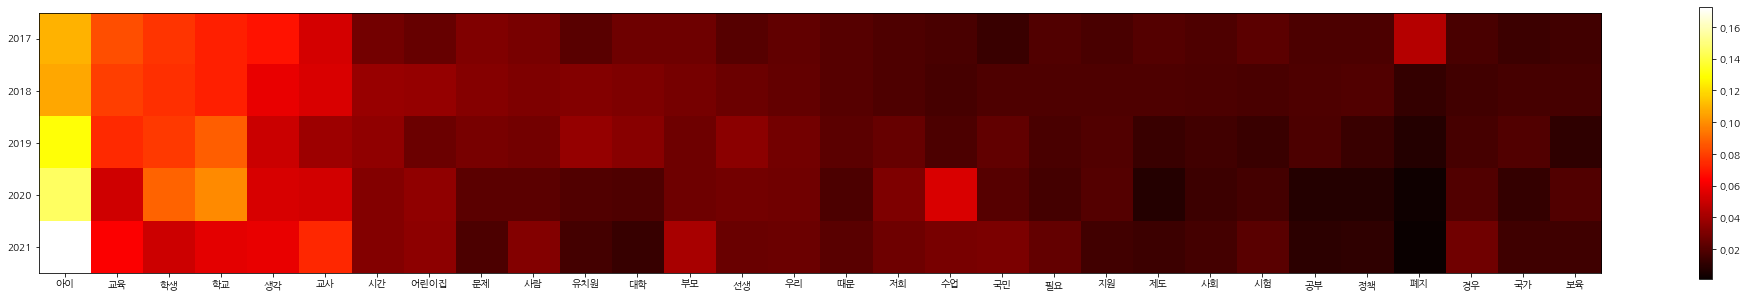

In [16]:
# hitmap graph
#print(df_h)
plt.figure(figsize=(35, 5))
plt.xticks(range(len(top30)), df_h2.columns)
plt.yticks(range(len(df_h2)), df_h2.index)
plt.imshow(df_h2, cmap='hot')
plt.colorbar()
plt.show()

In [25]:
df_h2 = df_h2.transpose()
df_h2.head()

,2017,2018,2019,2020,2021
아이,0.109143,0.106859,0.129869,0.145797,0.172593
교육,0.083675,0.079915,0.074696,0.052035,0.063327
학생,0.077116,0.075930,0.078347,0.089049,0.051129
학교,0.071906,0.071707,0.088069,0.099450,0.057098
생각,0.068873,0.058595,0.050565,0.053511,0.058396


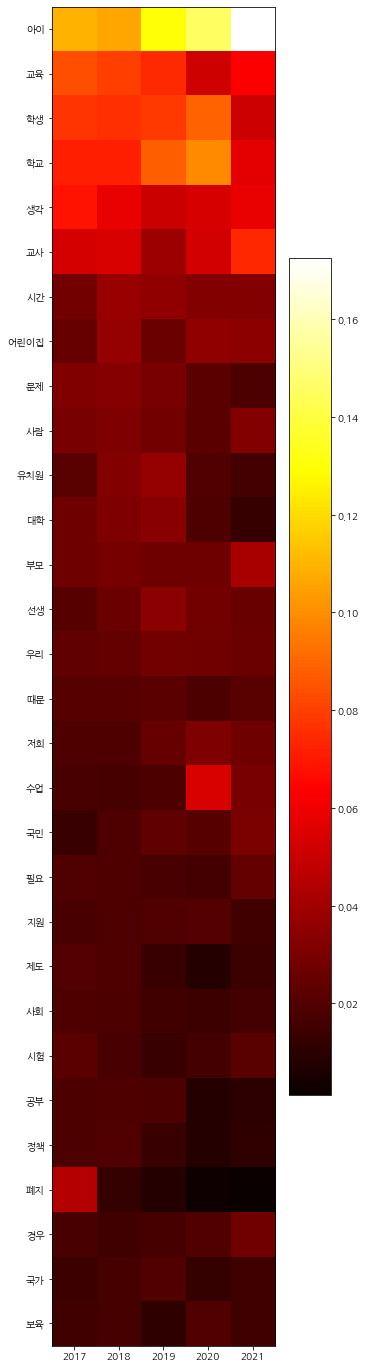

In [27]:
plt.figure(figsize=(5, 35))
plt.xticks(range(5), df_h2.columns)
plt.yticks(range(len(top30)), df_h2.index)
plt.imshow(df_h2, cmap='hot')
plt.colorbar()
plt.show()